In [ ]:
# Brandon Coleman
# Project 1
# 6 / 6 / 19
#Violations and Fines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

csv_file = "Resources/parking-citations.csv"
citations_df = pd.read_csv(csv_file, low_memory=False)

In [2]:
citations_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [317]:
citations_df['Violation Description'].nunique()

830

In [318]:
citations_df['Violation Description'].value_counts()

NO PARK/STREET CLEAN              2730747
METER EXP.                        1624483
RED ZONE                           709214
PREFERENTIAL PARKING               650147
DISPLAY OF TABS                    577836
NO PARKING                         419530
DISPLAY OF PLATES                  261671
WHITE ZONE                         210172
PARKED OVER TIME LIMIT             174295
NO STOP/STANDING                   169716
PARKED OVER TIME LIM               136763
STANDNG IN ALLEY                   132570
BLOCKING DRIVEWAY                  118282
STOP/STAND PROHIBIT                102673
YELLOW ZONE                         98166
NO EVIDENCE OF REG                  97200
NO STOP/STAND                       95575
PARKED ON SIDEWALK                  86156
18 IN. CURB/2 WAY                   83027
EXCEED 72HRS-ST                     81094
FIRE HYDRANT                        74589
DOUBLE PARKING                      63257
NO STOPPING/ANTI-GRIDLOCK ZONE      61439
OUTSIDE LINES/METER               

In [3]:
# there were singular instances of violation descriptions that were listed as a sequence of letters and digits
# create a list of acceptable, understandable descriptions 

vd_list = citations_df["Violation Description"].dropna().unique().tolist()
descript = []

for _strng in vd_list:
    _string = str(_strng)
    if(_string[0].isdigit()):
        if(' ' in _string):
            descript.append(_string)
    else :
        descript.append(_strng)
        

In [4]:
descript.sort() # sort in alphabetical order for ease of reading

In [5]:
trimmed_df = citations_df[citations_df["Violation Description"].isin(descript)] # trim dataframe down to usuable data

In [6]:
fines = trimmed_df['Fine amount'].dropna().unique().tolist()

In [7]:
trimmed_df = trimmed_df[trimmed_df['Fine amount'].isin(fines)]

In [8]:
# assign integer to Fine Amount column most fines were whole numbers
trimmed_df['Fine amount'] = trimmed_df['Fine amount'].astype('int64')

In [556]:
#refining violation description by renaming similar offenses for a more uniform consistent description
#results in ~143 different violations

trimmed_df['Violation Description'] = trimmed_df['Violation Description'].replace(
{  
  'ABAND VEH/HIGHWAY': 'ABANDONED VEHICLE',
  'ABAND VEH/PUB/PRIV': 'ABANDONED VEHICLE',
  'BLK BIKE PATH OR LAN': 'BLK BIKE PATH OR LANE',
  'BLK INT PROHIB': 'BLOCKING INTERSECTION',  
  'BLOCKING INTERSECTIO': 'BLOCKING INTERSECTION',
  'WITHIN INTERSECTION': 'BLOCKING INTERSECTION',
  'COMM VEH OVER TIME L':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM B-2':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM C-3':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM LMT':'COMM VEH OVER TIME LIMIT',
  'DEF WINDSHIELD': 'DEFECTIVE WIPERS',
  'DEFECT WIPERS' : 'DEFECTIVE WIPERS',
  'DISABLED PARKING/BOU': 'DISABLED PARKING',
  'DISABLED PARKING/BOUNDARIES': 'DISABLED PARKING',    
  'DISABLED PARKING/CRO': 'DISABLED PARKING',
  'DISABLED PARKING/CROSS HATCH': 'DISABLED PARKING',
  'DISABLED PARKING/NO': 'DISABLED PARKING',
  'DISABLED PARKING/NO DP ID': 'DISABLED PARKING',  
  'DISABLED PARKING/OBS': 'DISABLED PARKING',
  'DISABLED PARKING/OBSTRUCT ACCESS' : 'DISABLED PARKING', 
  'HANDICAP/CROSS HATCH':'DISABLED PARKING',
  'HANDICAP/NO DP ID':'DISABLED PARKING',
  'HANDICAP/ON LINE' :'DISABLED PARKING',
  'HANDICPD/BLOCKING':'DISABLED PARKING',
  'HANDICPD/ON LINE': 'DISABLED PARKING',  
  'BLOCK HANDICAP ACCES':'DISABLED PARKING',
  'DP- RO NOT PRESENT': 'DISABLED PARKING',
  'DP-ALTERED': 'DISABLED PARKING',
  'DP-BLKNG ACCESS RAMP': 'DISABLED PARKING',
  'DP-REFUSE ID': 'DISABLED PARKING',
  'DP-SUBPLATE': 'DISPLAY OF PLATES/TABS',
  'DISPLAY OF PLATES':'DISPLAY OF PLATES/TABS',
  'DISPLAY OF TABS':'DISPLAY OF PLATES/TABS',
  'DSPLYPLATE A':'DISPLAY OF PLATES/TABS',
  'DSPLYPLATE B':'DISPLAY OF PLATES/TABS',  
  'DOUBLE PARK': 'DOUBLE PARKING',
  'EXCEED 72 HOURS': 'EXCEEDED TIME LIMIT',
  'EXCEED 72HRS-ST' : 'EXCEEDED TIME LIMIT',
  'EXCEED TIME LMT': 'EXCEEDED TIME LIMIT',
  'NO STOP/STAND AM': 'NO STOPPING/STANDING', 
  'NO STOP/STAND PM': 'NO STOPPING/STANDING',
  'STOP/STAND PROHB': 'NO STOPPING/STANDING',
  'STOP/STAND PROHIBIT': 'NO STOPPING/STANDING',
  'NO STOP/STAND': 'NO STOPPING/STANDING',
  'NO STOP/STANDING': 'NO STOPPING/STANDING',
  'NO PARK/STREET CLEAN' : 'STREET CLEANING',
  'TM LMT EXCEEDED': 'EXCEEDED TIME LIMIT',
  'TIME LIMIT/CITY LOT': 'EXCEEDED TIME LIMIT',
  'PARKED OVER TIME LIM': 'EXCEEDED TIME LIMIT',
  'PARKED OVER TIME LIMIT': 'EXCEEDED TIME LIMIT',
  'PK BYND TM LMTS': 'EXCEEDED TIME LIMIT',
  'FAIL DEP COIN': 'NO COIN DEP IN METER',
  'PREF PARKING': 'PREFERENTIAL PARKING',
  'NO PARK STRT CLEAN': 'STREET CLEANING',
  'CLEANING VEH/STREET': 'STREET CLEANING',
  'METER EXP.':  'METER EXPIRED',
  'MISUSE/DP PRIVILEGE':'DISABLED PARKING',
  'MT FIRE RD NO PERMIT': 'OBST FIRE RD',
  'CLOSED MT FIRE RD' : 'OBST FIRE RD',
  'NO PARKING BETWEEN P': 'NO PARKING BETWEEN POSTED HOURS',
  'NO PK BET 1-3AM' : 'NO PARKING BETWEEEN POSTED HOURS',
  'NO STOPPING/ANTI-GRI':'ANTI-GRIDLOCK ZONE',
  'PARK IN GRID LOCK ZN' : 'ANTI-GRIDLOCK ZONE',
  'NO STOPPING/ANTI-GRIDLOCK ZONE': 'ANTI-GRIDLOCK ZONE' ,
  'LOAD/UNLOAD ONLY' : 'LOADING ZONES',
  'OFF STR/OVERTIME/MTR' : 'OFF STREET/OVERTIME',
  'OVERSIZED VEHICLE PA' : 'OVERSIZED VEHICLE PARKING',
  'OVERSIZED VEHICLE PARKING TOPHAM ST' : 'OVERSIZED VEHICLE PARKING',
  'OVNIGHT PRK W/OUT PE' : 'OVERNIGHT PARKING',
  'OVNIGHT PRK W/OUT PE' : 'RED FLAG DAY',
  'PK NR FIRE HYDR' : 'FIRE HYDRANT',
  'PARK RESTRCD': 'PK IN PROH AREA',
  'PARK-PSTD AREAS': 'PK IN PROH AREA',
  'PARKED IN BUS ZONE': 'PK IN PROH AREA',
  'PARKED IN CROSSWALK':'PK IN PROH AREA',
  'PARKED IN ELEC VEHICLE SPACE' : 'PK IN PROH AREA',
  'PARKED IN FIRE LANE': 'PK IN PROH AREA',
  'PARKED IN PARKWAY': 'PK IN PROH AREA',
  'PARKED ON BRIDGE': 'PK IN PROH AREA',
  'PARKED ON SIDEWALK': 'PK IN PROH AREA',
  'PARKING-SNOW AREA': 'PK IN PROH AREA',
  'PARKING/FRONT YARD': 'PK IN PROH AREA',
  'PARKING/FRONT YARD 1' : 'PK IN PROH AREA',
  'PARKING/FRONT YARD 2': 'PK IN PROH AREA',
  'PARKING/FRONT YARD 3' : 'PK IN PROH AREA',
  'PARKNG IN TUNNEL' : 'PK IN PROH AREA',
  'PARKING AREA' : 'PK IN PROH AREA',
  'PK TRAILER': 'PARKED TRAILER',
  'PK TRAILER 2': 'PARKED TRAILER',
  'PK TRAILER 3': 'PARKED TRAILER',    
  'PK OVERSIZED 1ST':'PARKED TRAILER',
  'PK OVERSIZED 2ND': 'PARKED TRAILER',
  'PK OVERSIZED 3RD':'PARKED TRAILER',
  'POSITION OF PLATES': 'DISPLAY OF PLATES/TABS',
  'PK ON PRIV ST' : 'PK IN PROH AREA',
  'PK OTSD PSTD AR' : 'PK IN PROH AREA',
  'PK OUTSD PK STL' : 'PK IN PROH AREA',
  'PK OUTSD SPACE' : 'PK IN PROH AREA',
  'PRKG PUBL GRNDS' : 'PK IN PROH AREA',
  'PK OVR 2 SPACES' : 'PK OVR PNTD LNS',
  'SIGN POSTED - NO PAR' : 'NO PARKING',
  'SIGN PSTD-NO PK' : 'NO PARKING',
  'SIGN POSTED - NO PARKING' : 'NO PARKING',
  'PARKING UNDESIGATED' : 'NO PARKING',
  'PARKING PROHIB' : 'NO PARKING',
  'YELLOW CURB' : 'COLOR ZONE',
  'WHITE CURB' : 'COLOR ZONE',
  'RED CURB' : 'COLOR ZONE',
  'YELLOW ZONE' : 'COLOR ZONE',
  'RED ZONE' : 'COLOR ZONE',
  'GREEN ZONE' : 'COLOR ZONE',
  'WHITE ZONE' : 'COLOR ZONE', 
  'PKD IN/ON PARKWAY' : 'PK IN PROH AREA',
  'RESTRCTD ZONES': 'RESTRICTED ZONE',
  'RESTRICTED TAXI ZONE': 'RESTRICTED ZONE',
  'STNDNG IN ALLEY' : 'STANDING IN ALLEY',
  'STANDNG IN ALLEY' : 'STANDING IN ALLEY'
})

In [557]:
trimmed_df['Violation Description'].nunique()

116

In [558]:
groupedby = trimmed_df.groupby('Violation Description') #group by violation description

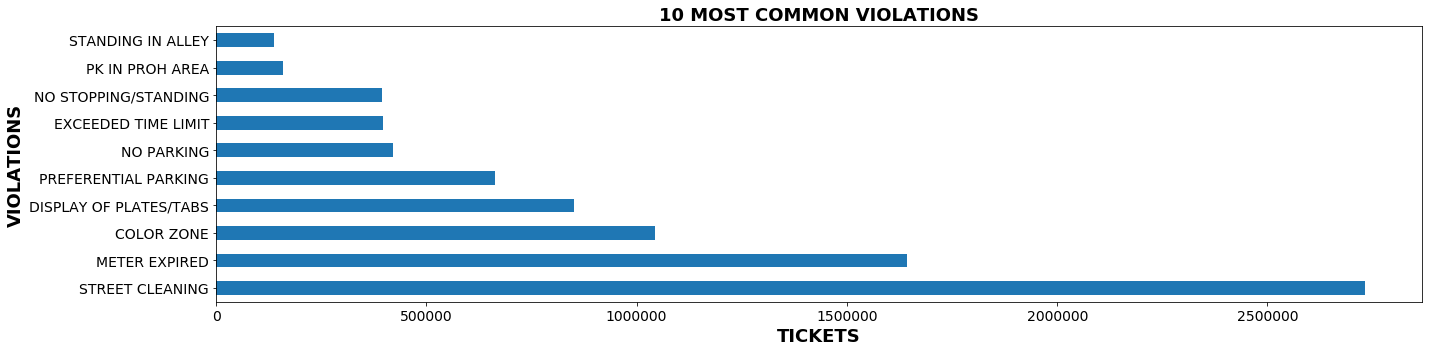

In [559]:
# grab the n most cited violations and chart them via bar chart

num_violations = groupedby.count()['Fine amount'].nlargest(n=10, keep='first')
num_violations.plot.barh(figsize=(20,5))

plt.title("10 MOST COMMON VIOLATIONS", fontsize=18, weight='bold')

plt.ylabel("VIOLATIONS", fontsize=18, rotation=90, weight='bold')
plt.xlabel("TICKETS", fontsize=18, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("../Data/Images/top_violations.png")
plt.show()

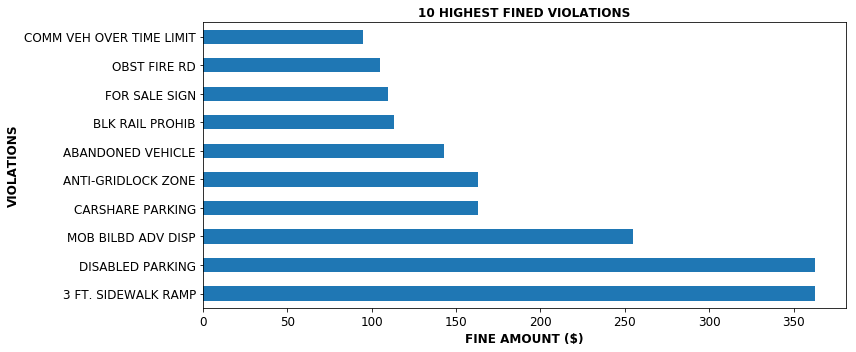

In [560]:
avg_fine_vio = groupedby.mean()['Fine amount']
avg_fine_vio = avg_fine_vio.sort_values(inplace=False, ascending=False).nlargest(n=10, keep='last')
avg_fine_vio.plot.barh(figsize=(12,5))

plt.title("10 HIGHEST FINED VIOLATIONS", fontsize=12, weight='bold')

plt.ylabel("VIOLATIONS", fontsize=12, rotation=90, weight='bold')
plt.xlabel("FINE AMOUNT ($)", fontsize=12, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("../Data/Images/fined_violations.png")
plt.show()

In [15]:
total_revenue = trimmed_df['Fine amount'].sum()
total_revenue

655249460

In [16]:
total_revenue / len(trimmed_df)

69.99971262971056

In [341]:
sum_fines = groupedby.sum()["Fine amount"].nlargest(n=10, keep='first')
sum_fines.keys()

Index(['STREET CLEANING', 'METER EXPIRED', 'COLOR ZONE',
       'PREFERENTIAL PARKING', 'NO STOPPING/STANDING', 'NO PARKING',
       'EXCEEDED TIME LIMIT', 'DISPLAY OF PLATES/TABS', 'DISABLED PARKING',
       'ANTI-GRIDLOCK ZONE'],
      dtype='object', name='Violation Description')

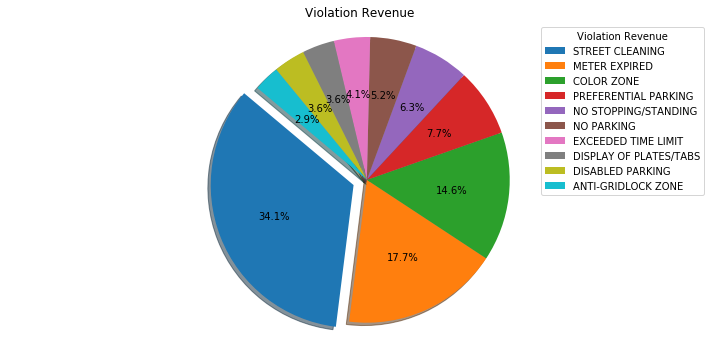

In [378]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
pies = sum_fines.keys()
percent_of = np.round((sum_fines / total_revenue)*100, 2)
percent_of.plot.pie(figsize=(10,5),labels=None, explode=explode, shadow=True, startangle=140, textprops={'fontsize': 10,\
                    }, autopct="%1.1f%%")

plt.title("Violation Revenue")
plt.ylabel("")
plt.tight_layout()
plt.axis("equal")
plt.legend(title="Violation Revenue", labels = pies)
plt.savefig("../Data/Images/pierevenue.png")
plt.show()

In [379]:
n_locations = trimmed_df.groupby('Location').count()['Violation Description'].nlargest(n=10, keep='first')

In [381]:
#top_locales = n_locations.reset_index()['Location'].tolist()
top_locales = n_locations.keys()

In [382]:
#top_violations = num_violations.to_frame().reset_index()['Violation Description'].tolist()
top_violations = num_violations.keys()

In [383]:
top_locales #list of most ticketed locations

Index(['1301 ELECTRIC AVE', '101 LARCHMONT BL N', '11600 SAN VICENTE BL',
       '1600 IRVING TABOR CT', '2377 MIDVALE AVE', '4301 TUJUNGA AV',
       '5901 98TH ST W', '7000 HAWTHORN AVE', '12100 VENTURA BL',
       '4300 TUJUNGA AV'],
      dtype='object', name='Location')

In [384]:
top_violations #list of 10 most violations cited

Index(['STREET CLEANING', 'METER EXPIRED', 'COLOR ZONE',
       'DISPLAY OF PLATES/TABS', 'PREFERENTIAL PARKING', 'NO PARKING',
       'EXCEEDED TIME LIMIT', 'NO STOPPING/STANDING', 'PK IN PROH AREA',
       'STANDING IN ALLEY'],
      dtype='object', name='Violation Description')

In [385]:
# create observed and expected dataframes of top_violations at top_locales
observed_df = pd.DataFrame(columns=top_locales, index=top_violations)
expected_df = pd.DataFrame(columns=top_locales, index=top_violations)

In [386]:
# fill observed dataframe with violation totals at top 10 ticketed locations
for vio in top_violations:
    for locale in top_locales:
        n_tickets = len(trimmed_df[(trimmed_df['Violation Description'] == vio) & (trimmed_df['Location'] == locale)])
        observed_df.at[vio, locale] = n_tickets

In [387]:
observed_df = observed_df.astype('int64')

In [388]:
observed_df

Location,1301 ELECTRIC AVE,101 LARCHMONT BL N,11600 SAN VICENTE BL,1600 IRVING TABOR CT,2377 MIDVALE AVE,4301 TUJUNGA AV,5901 98TH ST W,7000 HAWTHORN AVE,12100 VENTURA BL,4300 TUJUNGA AV
Violation Description,,,,,,,,,,
STREET CLEANING,50,4,0,0,0,0,82,862,0,4
METER EXPIRED,8410,7014,6009,5143,110,5203,4647,0,4176,4821
COLOR ZONE,18,63,362,1,5,12,115,224,14,10
DISPLAY OF PLATES/TABS,1161,455,648,919,583,225,348,208,427,217
PREFERENTIAL PARKING,0,1,0,0,4,0,0,3981,0,0
NO PARKING,29,0,3,133,1167,1,26,2,0,0
EXCEEDED TIME LIMIT,41,0,5,6,1,0,19,46,2,0
NO STOPPING/STANDING,0,0,0,31,0,0,2,7,1,0
PK IN PROH AREA,2,1,0,0,1,0,0,0,1,0


In [187]:
observed_df.T

,NO PARK/STREET CLEAN,METER EXPIRED,COLOR ZONE,DISPLAY OF PLATES/TABS,PREFERENTIAL PARKING,NO PARKING,EXCEEDED TIME LIMIT,NO STOPPING/STANDING,PK IN PROH AREA,STANDING IN ALLEY
1301 ELECTRIC AVE,50,8410,18,1161,0,29,41,0,2,4
101 LARCHMONT BL N,4,7014,63,455,1,0,0,0,1,0
11600 SAN VICENTE BL,0,6009,362,648,0,3,5,0,0,5
1600 IRVING TABOR CT,0,5143,1,919,0,133,6,31,0,89
2377 MIDVALE AVE,0,110,5,583,4,1167,1,0,1,0
4301 TUJUNGA AV,0,5203,12,225,0,1,0,0,0,0
5901 98TH ST W,82,4647,115,348,0,26,19,2,0,0
7000 HAWTHORN AVE,862,0,224,208,3981,2,46,7,0,0
12100 VENTURA BL,0,4176,14,427,0,0,2,1,1,15
4300 TUJUNGA AV,4,4821,10,217,0,0,0,0,0,1


In [390]:
stats.chisquare(observed_df.T, axis=None)

Power_divergenceResult(statistic=446558.37136669125, pvalue=0.0)

In [391]:
# create key/value dictionaries for violation and locale sums to be
# used to calculate expected values dataframe
# summing each of the 10 rows, and each of the 10 columns
violation_sums = observed_df.sum(axis=1).to_dict()
locale_sums = observed_df.sum().to_dict()

In [392]:
observed_df.sum()

Location
1301 ELECTRIC AVE       9715
101 LARCHMONT BL N      7538
11600 SAN VICENTE BL    7032
1600 IRVING TABOR CT    6322
2377 MIDVALE AVE        1871
4301 TUJUNGA AV         5441
5901 98TH ST W          5239
7000 HAWTHORN AVE       5330
12100 VENTURA BL        4636
4300 TUJUNGA AV         5053
dtype: int64

In [394]:
#total amount of tickets given
N = observed_df.sum().sum()
N

58177

In [395]:
# fill expected dataframe with calculations
# total row x total column 
for vio in top_violations:
    for locale in top_locales:
        Ex_Val = ((violation_sums[vio] * locale_sums[locale]) / N)
        expected_df.at[vio, locale] = Ex_Val

In [396]:
expected_df = expected_df.astype('float64')

In [397]:
expected_df

Location,1301 ELECTRIC AVE,101 LARCHMONT BL N,11600 SAN VICENTE BL,1600 IRVING TABOR CT,2377 MIDVALE AVE,4301 TUJUNGA AV,5901 98TH ST W,7000 HAWTHORN AVE,12100 VENTURA BL,4300 TUJUNGA AV
Violation Description,,,,,,,,,,
STREET CLEANING,167.324372,129.829245,121.114255,108.885711,32.224797,93.711982,90.232876,91.800196,79.847225,87.029341
METER EXPIRED,7603.573491,5899.715592,5503.687987,4947.997078,1464.362944,4258.470753,4100.372776,4171.595132,3628.426835,3954.797411
COLOR ZONE,137.600083,106.765767,99.598948,89.542740,26.500232,77.064544,74.203482,75.492377,65.662788,71.569039
DISPLAY OF PLATES/TABS,866.847122,672.598415,627.449198,564.097530,166.945030,485.487925,467.463929,475.583650,413.659625,450.867577
PREFERENTIAL PARKING,665.623700,516.466439,481.797824,433.152139,128.191656,372.790381,358.950341,365.185211,317.635767,346.206542
NO PARKING,227.273923,176.344913,164.507486,147.897657,43.770408,127.287433,122.561820,124.690685,108.455163,118.210513
EXCEEDED TIME LIMIT,20.038847,15.548413,14.504701,13.040205,3.859257,11.222992,10.806332,10.994035,9.562542,10.422676
NO STOPPING/STANDING,6.846606,5.312374,4.955773,4.455403,1.318580,3.834522,3.692164,3.756295,3.267202,3.561081
PK IN PROH AREA,0.834952,0.647851,0.604363,0.543342,0.160802,0.467625,0.450264,0.458085,0.398439,0.434278


In [401]:
# Perform chi-square test on both dataframes 
# With 10 rows the degree of freedom is 10 - 1 = 9
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 99)

# Run the chi square test with stats.chisquare()
stats.chisquare(observed_df, axis=None)

Power_divergenceResult(statistic=446558.37136669125, pvalue=0.0)

In [399]:
critical_value

123.2252214533618

In [ ]:
# because statistic array is greater than the critical value :
#reject the null hypothesis - that violations are independent of location
# depending where you are, you are more likely to receive one kind of violation

In [561]:
tesla_df = trimmed_df[trimmed_df['Make']=='TESL']

In [562]:
tesla_df = tesla_df['Violation Description'].value_counts().nlargest(n=10, keep='first')

In [563]:
car_dict = tesla_df.to_dict()

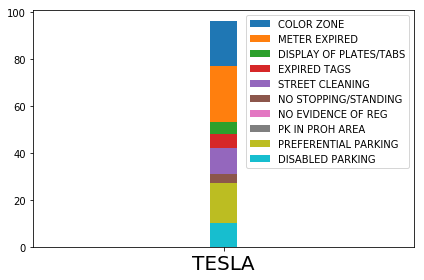

In [564]:
x="TESLA"
y_pos=[0]
for n in car_dict:
    plt.bar(x, car_dict[n])
    
plt.bar(y_pos, 0, 10.0, align='center', color='white', edgecolor='black', label=None)
plt.legend(car_dict)
plt.tight_layout()
plt.savefig("../Data/Images/tesla_violations.png")
plt.show()